#                      INVESTMENT ASSIGNMENT

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import os

In [327]:
rounds2 = pd.read_csv('rounds2.csv',encoding='iso-8859-1')  # Reading rounds2.csv file

#### Checked the encoding scheme of the file using the below syntax and later converted it to markdown cell as it was effecting the run time.

 with open("rounds2.csv", "rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)'''

In [328]:
rounds2.shape

(114949, 6)

In [329]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [330]:
# Encoding 
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('iso-8859-1').str.decode('ascii', 'ignore')

In [331]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [332]:
# Converting key column to lower case for merging well with companies
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: x.lower())

In [333]:
#Removing redundant columns from rounds2 data set
rounds2 = rounds2.drop(['funding_round_code','funding_round_permalink','funded_at'], axis=1)

In [334]:
rounds2.tail()

,company_permalink,funding_round_type,raised_amount_usd
114944,/organization/zzzzapp-com,convertible_note,41313.0
114945,/organization/zzzzapp-com,seed,32842.0
114946,/organization/eron,venture,NaN
114947,/organization/asys-2,seed,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,grant,14851.0


In [335]:
# Funding type based on count 
rounds2['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [336]:
#Percentage of null values in funding amount column
print(100*rounds2['raised_amount_usd'].isnull().sum()/len(rounds2['raised_amount_usd']))

17.390320924931927


In [337]:
rounds2=rounds2.drop_duplicates() # droping duplicate rows

In [338]:
rounds2['company_permalink'].nunique() # Gives the count of unique companies 

66368

##### 66368 unique companies in rounds2

In [339]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112234 entries, 0 to 114948
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   112234 non-null  object 
 1   funding_round_type  112234 non-null  object 
 2   raised_amount_usd   93648 non-null   float64
dtypes: float64(1), object(2)
memory usage: 3.4+ MB


In [340]:
companies = pd.read_csv('companies.csv',encoding='iso-8859-1')  # Reading companies.csv file

#### Checked the encoding scheme of the file using the below syntax and later converted it to markdown cell as it was effecting the run time.

with open("companies.csv", "rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

In [341]:
companies.sample(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
54229,/Organization/Sprooki,Sprooki,http://www.sprooki.com,Location Based Services|Mobile|Mobile Commerce...,operating,SGP,NaN,Singapore,Singapore,01-02-2011
62699,/Organization/Votigo,Votigo,http://www.votigo.com,Advertising|Content|Contests|Enterprise Softwa...,operating,USA,CO,Denver,Boulder,01-07-2006
50292,/Organization/Seeds-2,Seeds,http://playseeds.com/,Apps,operating,USA,NY,New York City,New York,NaN
54880,/Organization/Stormpulse,Stormpulse,http://www.stormpulse.com,B2B|Enterprise Software|News,operating,USA,TX,Austin,Austin,01-08-2007
64032,/Organization/Winebibber,Jiuxian.com,http://www.jiuxian.com,E-Commerce,operating,CHN,22,Beijing,Beijing,NaN


In [342]:
# Encoding 
companies['permalink'] = companies['permalink'].str.encode('iso-8859-1').str.decode('ascii', 'ignore')

In [343]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [344]:
# Converting key column data to lower case for merging well with rounds dataset
companies['permalink']=companies['permalink'].apply(lambda x: x.lower())

In [345]:
companies=companies.drop_duplicates() # droping duplicate rows

In [346]:
#Removing redundant columns from companies data set
companies = companies.drop(['homepage_url','status','state_code','region','city','founded_at'], axis=1)

In [347]:
companies['country_code'].isnull().sum() # keeping null values for time being

6958

In [348]:
companies.sample(5)

,permalink,name,category_list,country_code
22415,/organization/geliyoo,Geliyoo,Internet|Operating Systems|Search|Web Browsers,TUR
4338,/organization/array-biopharma,Array BioPharma,Biotechnology,USA
61350,/organization/velocloud,"VeloCloud, Inc.",Networking,USA
38958,/organization/new-media-gateway,New Media Gateway,Software,USA
35982,/organization/mindframe-inc,Mindframe,Biotechnology,USA


In [349]:
companies['permalink'].nunique() # Gives the count of unique companies 

66368

##### 66368 unique companies in companies

3. Are there any companies in the rounds2 file which are not  present in companies ? 

In [350]:
rounds2[~(rounds2['company_permalink'].isin(companies['permalink']))]

,company_permalink,funding_round_type,raised_amount_usd


##### There are no companies in the rounds2 file which are not  present in companies

In [351]:
# merging rounds2 and companies dataframes
master_frame = pd.merge(rounds2,companies, left_on='company_permalink', right_on='permalink')

In [352]:
# Total observation in master data set
master_frame.shape

(112234, 7)

##### There are 112234 observations are present in master_frame

In [353]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112234 entries, 0 to 112233
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   112234 non-null  object 
 1   funding_round_type  112234 non-null  object 
 2   raised_amount_usd   93648 non-null   float64
 3   permalink           112234 non-null  object 
 4   name                112233 non-null  object 
 5   category_list       108938 non-null  object 
 6   country_code        103752 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.9+ MB


In [354]:
master_frame.tail(5)

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code
112229,/organization/zzzzapp-com,convertible_note,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
112230,/organization/zzzzapp-com,seed,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
112231,/organization/eron,venture,NaN,/organization/eron,ÃERON,NaN,NaN
112232,/organization/asys-2,seed,18192.0,/organization/asys-2,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA
112233,/organization/novatiff-reklam-ve-tantm-hizmetl...,grant,14851.0,/organization/novatiff-reklam-ve-tantm-hizmetl...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,NaN


In [355]:
master_frame = master_frame.drop(['permalink'],axis=1) # dropping the redundant key column used for merging

In [356]:
#Filtering data for funding amount between 5 Million to 15 Million
master_frame = master_frame[(master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000)]

In [357]:
master_frame['raised_amount_usd'].describe() # Gives statistical information of the funding amount in the whole dataset

count    1.847600e+04
mean     8.824436e+06
std      3.053000e+06
min      5.000000e+06
25%      6.000000e+06
50%      8.100000e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [358]:
# Filling the null values in funding amount column by median value.
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].fillna(master_frame['raised_amount_usd'].median())

In [359]:
master_frame['country_code'].isnull().sum() # checking for total null values in country code

805

In [360]:
master_frame['country_code'].mode() # Check for highest frequency value in country code column

0    USA
dtype: object

In [361]:
# filling null with highest frequency value
master_frame['country_code'] = master_frame['country_code'].fillna('USA') 

In [362]:
#Calculating the percentage of null values in category_list
print(100*(master_frame['category_list'].isnull().sum())/len(master_frame['category_list']))

1.2610954752110846


In [363]:
# Filtering rows with null values in category_list columns 
master_frame=master_frame[~(master_frame['category_list'].isnull())]

In [364]:
#Extracting the primary sector of each category list from the category_list column
master_frame['primary_sector']= master_frame['category_list'].apply(lambda x: x.split('|',1)[0])

In [365]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18243 entries, 0 to 112221
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   18243 non-null  object 
 1   funding_round_type  18243 non-null  object 
 2   raised_amount_usd   18243 non-null  float64
 3   name                18243 non-null  object 
 4   category_list       18243 non-null  object 
 5   country_code        18243 non-null  object 
 6   primary_sector      18243 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [366]:
#Filtering master_frame data set for required funding types
funding_type_list = ['venture','angel','seed','private_equity']
master_frame = master_frame[master_frame['funding_round_type'].isin(funding_type_list)]
master_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,Analytics
21,/organization/1-800-publicrelations-inc-,private_equity,6000000.0,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,USA,Internet Marketing
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,Apps
45,/organization/1001-menus,venture,6602694.0,ZenChef,Local Businesses|Restaurants,FRA,Local Businesses
...,...,...,...,...,...,...,...
112201,/organization/zynstra,venture,8400000.0,Zynstra,Software,GBR,Software
112205,/organization/zyomyx-inc,venture,12000000.0,ZYOMYX,Biotechnology,USA,Biotechnology
112207,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,Biotechnology,USA,Biotechnology
112216,/organization/zyraz-technology,venture,7991547.0,Zyraz Technology,Biotechnology,MYS,Biotechnology


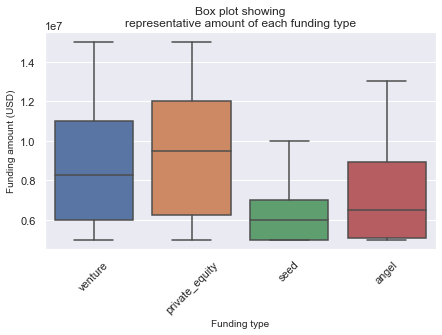

In [367]:
#plotting a box plot to understand visually the statistical information of funding amount for various funding type
# hiding outliers in the plot to get a clear view
plt.figure(figsize=[7,4])
fig = sns.boxplot(data = master_frame, x = 'funding_round_type', y = 'raised_amount_usd',showfliers=False).set(title = 'Box plot showing' '\n' 'representative amount of each funding type')
plt.xticks(rotation=45)
plt.ylabel('Funding amount (USD)', fontsize=10)
plt.xlabel('Funding type', fontsize=10)
plt.show()

In [368]:
# Since there are outliers in funding amount, the best representative value would be its median.
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()

funding_round_type
angel             7.243515e+06
private_equity    9.273356e+06
seed              6.604623e+06
venture           8.882770e+06
Name: raised_amount_usd, dtype: float64

In [369]:
master_frame['funding_round_type'].value_counts()

venture           16051
private_equity      424
seed                198
angel                71
Name: funding_round_type, dtype: int64

In [370]:
#filtering the data so that it only contains the venture investment type.
master_frame=master_frame[master_frame['funding_round_type']=='venture']

#### To make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)


In [371]:
#grouping master_frame by country w.r.t total funding amount and assigning it to new dataframe 'top' & sorting values in descending order
master_frame.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending=False).head(9).index

Index(['USA', 'GBR', 'CHN', 'CAN', 'IND', 'ISR', 'FRA', 'DEU', 'SGP'], dtype='object', name='country_code')

In [372]:

top9 = master_frame[master_frame['country_code'].isin(['USA', 'GBR', 'CHN', 'CAN', 'IND', 'ISR', 'FRA', 'DEU', 'SGP'])]

In [373]:
top9.sample(5)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
45465,/organization/imagination-technologies,venture,9863479.0,Imagination Technologies,Semiconductors,GBR,Semiconductors
5365,/organization/ampush-media,venture,15000000.0,Ampush,Advertising|Advertising Platforms|Digital Medi...,USA,Advertising
46806,/organization/innerscope-research,venture,9400000.0,Innerscope Research,Biotechnology,USA,Biotechnology
19702,/organization/clariphy-communications,venture,7500000.0,ClariPhy Communications,Semiconductors,USA,Semiconductors
46516,/organization/inform-technologies,venture,15000000.0,Inform Technologies,Curated Web|Journalism|Media|Semantic Web,USA,Curated Web


In [374]:
top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15090 entries, 0 to 112221
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   15090 non-null  object 
 1   funding_round_type  15090 non-null  object 
 2   raised_amount_usd   15090 non-null  float64
 3   name                15090 non-null  object 
 4   category_list       15090 non-null  object 
 5   country_code        15090 non-null  object 
 6   primary_sector      15090 non-null  object 
dtypes: float64(1), object(6)
memory usage: 943.1+ KB


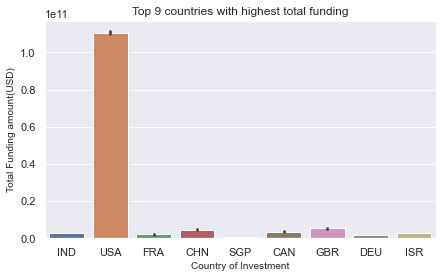

In [375]:
# plotting a bar plot to find the countries with more investment funding
plt.figure(figsize=[7,4])
sns.barplot(data=top9, x='country_code', y ='raised_amount_usd',estimator=sum).set(title='Top 9 countries with highest total funding')
plt.ylabel('Total Funding amount(USD)', fontsize=10)
plt.xlabel('Country of Investment', fontsize=10)
plt.show()

#### Checkpoint 4: Sector Analysis 1

In [376]:
mapping = pd.read_csv('mapping.csv',encoding='iso-8859-1')  # Reading mapping.csv file

In [377]:
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


##### Mapping main_sectors to category_list and merging it to master frame

In [378]:
#unpivoting mapping dataset
mapping = pd.melt(mapping, id_vars =['category_list'], var_name ='Main_sector')
mapping.tail(5)

,category_list,Main_sector,value
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0
6191,Young Adults,"Social, Finance, Analytics, Advertising",0


In [379]:
mapping = mapping[mapping['value']==1]
mapping = mapping.drop(['value'], axis=1)

In [380]:
mapping.sample(5)

,category_list,Main_sector
4935,Collectibles,Others
4640,Peer-to-Peer,"News, Search and Messaging"
2050,Water,Cleantech / Semiconductors
4196,Blogging Platforms,"News, Search and Messaging"
5123,Gift Exchange,Others


In [381]:
master_frame = pd.merge(master_frame,mapping, left_on='category_list', right_on ='category_list')

In [382]:
master_frame.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector,Main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media,Entertainment
1,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Media,Entertainment
2,/organization/basel-switzerland,venture,13439178.0,The Speedel Group,Media,CHE,Media,Entertainment
3,/organization/123greetings,venture,5400000.0,123Greetings,Internet,USA,Internet,"News, Search and Messaging"
4,/organization/51zhangdan,venture,15000000.0,51Zhangdan,Internet,CHN,Internet,"News, Search and Messaging"


In [418]:
master_frame = master_frame[master_frame['country_code'].isin(['USA', 'GBR', 'CHN', 'CAN', 'IND', 'ISR', 'FRA', 'DEU', 'SGP'])]

In [419]:
data = pd.pivot_table(data=master_frame, values='raised_amount_usd', index='country_code',columns='Main_sector', aggfunc=sum)

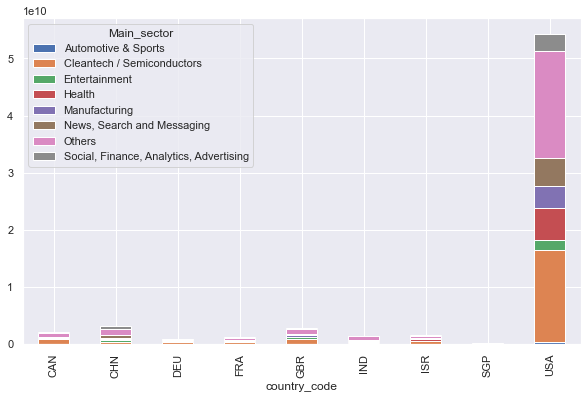

In [420]:
data.plot(kind='bar',stacked='True',figsize=[10,6])
plt.show()

#### Creating D1, D2 and D3 dataframes from master_frames

In [406]:
D1 = master_frame[master_frame['country_code']=='USA']
D1 = D1.sort_values('raised_amount_usd', ascending = False)
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 7385 to 1
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   6092 non-null   object 
 1   funding_round_type  6092 non-null   object 
 2   raised_amount_usd   6092 non-null   float64
 3   name                6092 non-null   object 
 4   category_list       6092 non-null   object 
 5   country_code        6092 non-null   object 
 6   primary_sector      6092 non-null   object 
 7   Main_sector         6092 non-null   object 
dtypes: float64(1), object(7)
memory usage: 428.3+ KB


In [ ]:
D2 = master_frame[master_frame['country_code']=='GBR']
D2 = D2.sort_values('raised_amount_usd', ascending = False)

In [385]:
D3 = master_frame[master_frame['country_code']=='CAN']
D3 = D3.sort_values('raised_amount_usd', ascending = False)

In [386]:
D1['raised_amount_usd'].count(), D1['raised_amount_usd'].sum()

(6092, 54342224020.0)

In [387]:
D2['raised_amount_usd'].count(), D2['raised_amount_usd'].sum()

(333, 2929451457.0)

In [388]:
D3['raised_amount_usd'].count(), D3['raised_amount_usd'].sum()

(246, 2112807794.0)

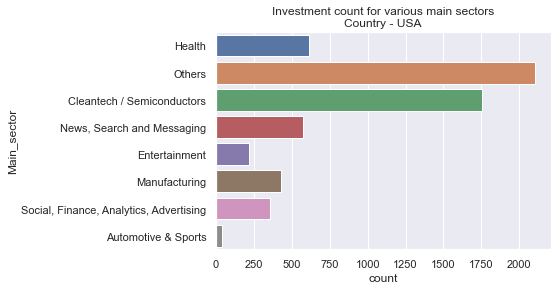

In [411]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Main_sector", data=D1).set(title='Investment count for various main sectors''\n''Country - USA')
plt.show()

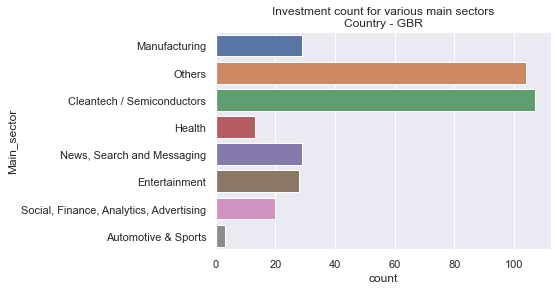

In [412]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Main_sector", data=D2).set(title='Investment count for various main sectors''\n''Country - GBR')
plt.show()

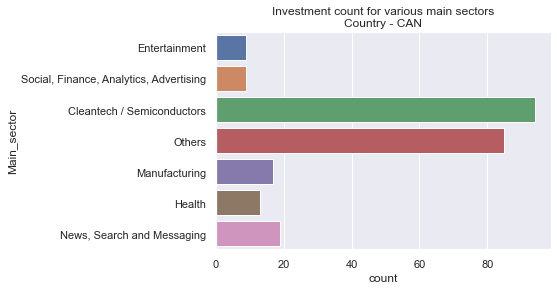

In [413]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Main_sector", data=D3).set(title='Investment count for various main sectors''\n''Country - CAN')
plt.show()

In [392]:
D1['Main_sector'].value_counts().head(3)

Others                        2101
Cleantech / Semiconductors    1757
Health                         615
Name: Main_sector, dtype: int64

In [393]:
D2['Main_sector'].value_counts().head(3)

Cleantech / Semiconductors    107
Others                        104
News, Search and Messaging     29
Name: Main_sector, dtype: int64

In [394]:
D3['Main_sector'].value_counts().head(3)

Cleantech / Semiconductors    94
Others                        85
News, Search and Messaging    19
Name: Main_sector, dtype: int64

In [395]:
D1.name[(D1['Main_sector']=='Others')].head(1)

4160    BlueArc
Name: name, dtype: object

In [396]:
D1.name[(D1['Main_sector']=='Cleantech / Semiconductors')].head(1)

2403    ForSight Labs
Name: name, dtype: object

In [397]:
D2.name[(D2['Main_sector']=='Others')].head(1)

4946    SenSage
Name: name, dtype: object

In [398]:
D2.name[(D2['Main_sector']=='Cleantech / Semiconductors')].head(1)

3833    Elixent
Name: name, dtype: object

In [399]:
D3.name[(D3['Main_sector']=='Others')].head(1)

3579    QuickPlay Media
Name: name, dtype: object

In [400]:
D3.name[(D3['Main_sector']=='Cleantech / Semiconductors')].head(1)

3818    Diablo Technologies
Name: name, dtype: object

In [401]:
Main_sector_top3 = ['Cleantech / Semiconductors','Others','Health','News, Search and Messaging']
main_countries = ['USA','CAN','GBR']
master_frame_final = master_frame[(master_frame['country_code'].isin(main_countries)) & (master_frame['Main_sector'].isin(Main_sector_top3)) & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000)]
master_frame_final = master_frame_final[['country_code','Main_sector']]

In [402]:
Heatmap_result = pd.pivot_table(data=master_frame_final,index='country_code',columns='Main_sector',aggfunc='size', fill_value=0)

In [403]:
Heatmap_result

Main_sector,Cleantech / Semiconductors,Health,"News, Search and Messaging",Others
country_code,,,,
CAN,94,13,19,85
GBR,107,13,29,104
USA,1757,615,573,2101


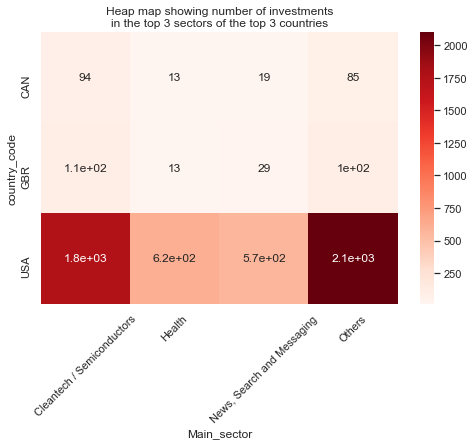

In [408]:
plt.figure(figsize=[8,5])
sns.heatmap(Heatmap_result,cmap = "Reds", annot =True).set(title = 'Heap map showing number of investments''\n''in the top 3 sectors of the top 3 countries')
plt.xticks(rotation=45)
plt.show()